# #                              Avacodo Project

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.  

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.  

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.  

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. 

Some relevant columns in the dataset: 

Date - The date of the observation 

AveragePrice - the average price of a single avocado 

type - conventional or organic 

year - the year 

Region - the city or region of the observation 

Total Volume - Total number of avocados sold 

4046 - Total number of avocados with PLU 4046 sold 

4225 - Total number of avocados with PLU 4225 sold 

4770 - Total number of avocados with PLU 4770 sold 

 

Inspiration /Label  

The dataset can be seen in two angles to find the region and find the average price . 

Task: One of Classification and other of Regression 


In [70]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib



import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools


# Models from SkLearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay


# allow plots to appear directly in the notebook
%matplotlib inline



from subprocess import check_output

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset

df= pd.read_csv("C:\\Users\\gupta\\OneDrive\\Desktop\\phase 1\\avocado.csv")

In [4]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [7]:
# Number of rows and columns
df.shape

(18249, 13)

In [8]:
#names of the columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
#null values
df.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Get the unique values of 'type' column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [18]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [11]:
# Get the unique values of 'region' column
uv2=df.region.unique()

In [12]:
uv2

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
count = df[['type','region','year']].nunique()


In [20]:
#counting unique values in the columns 'type' and 'regions'
count

type       2
region    54
year       4
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## Type of Avocado vs Average Price

<Axes: xlabel='AveragePrice', ylabel='type'>

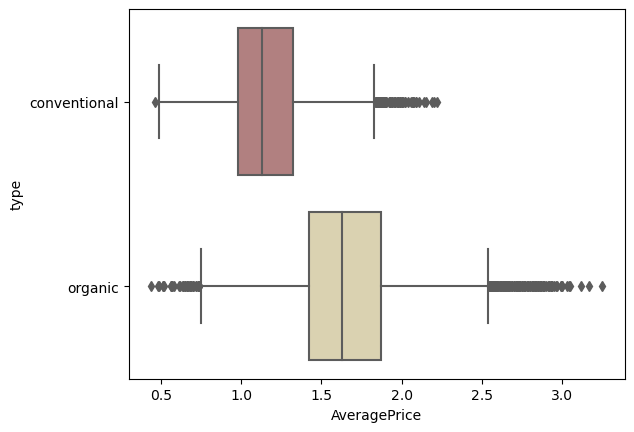

In [23]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink')

Observations:
1. In conventional type avacado's price has maximum outliers.
2. In organic type of avacado's price has maximum outliers and minimum outliers too.
3. Organic fruit price is more as compared to conventional fruit.

In [26]:
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)

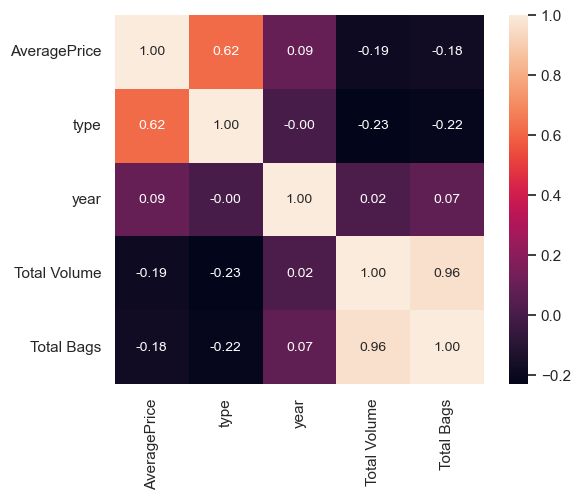

In [29]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels = cols, xticklabels = cols)

Obesrvation:
1. There is a strong relation between Total Bags and Total Volume ie, 0.96 
2.  type and AveragePrice ie, 0.62.
3. Other than that there is weak realation.

In [64]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [65]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


In [57]:
type_agg = df.groupby('type')['Total Volume'].agg('sum')

# Now, access the values safely
values = [type_agg.get('conventional', 0), type_agg.get('organic', 0)]  # .get method avoids KeyError, returns 0 if not found
labels = ['conventional', 'organic']

# Assuming you're using Plotly for plotting
import plotly.graph_objects as go
trace = go.Pie(labels=labels, values=values)

# If you need to plot the pie chart
fig = go.Figure(data=[trace])
fig.show()

## Total Volume vs Small, Large and XLarge

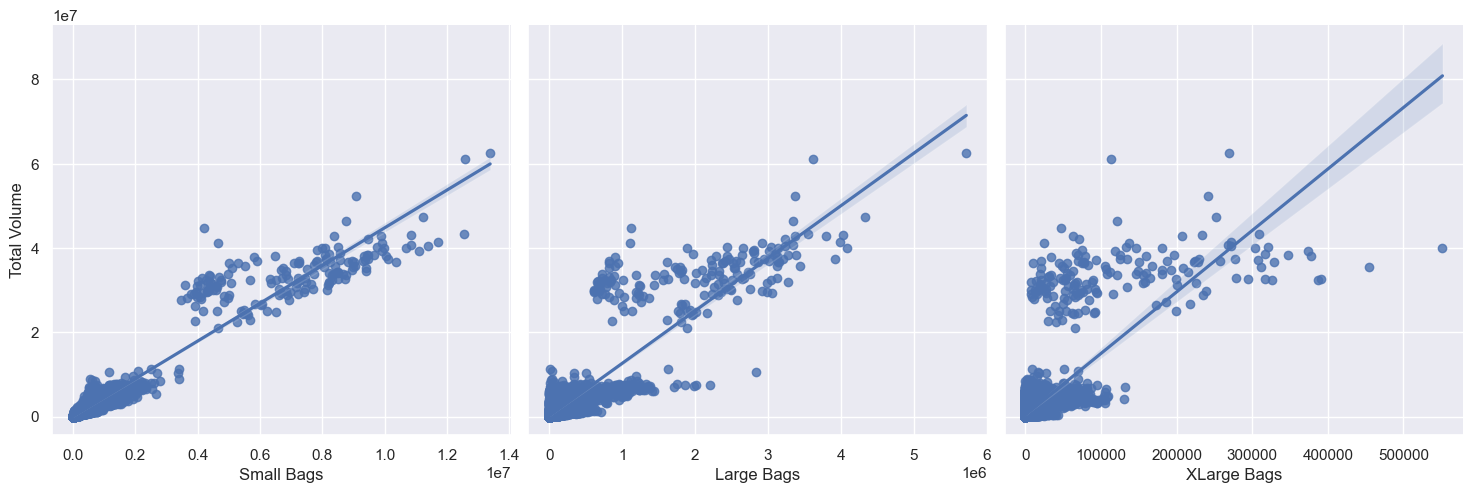

In [55]:
# Assuming 'small', 'large', and 'xLarge' are the correct column names
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', height=5, aspect=1, kind='reg')


## Total Bags vs Small Bags, Large Bags and XLarge Bags

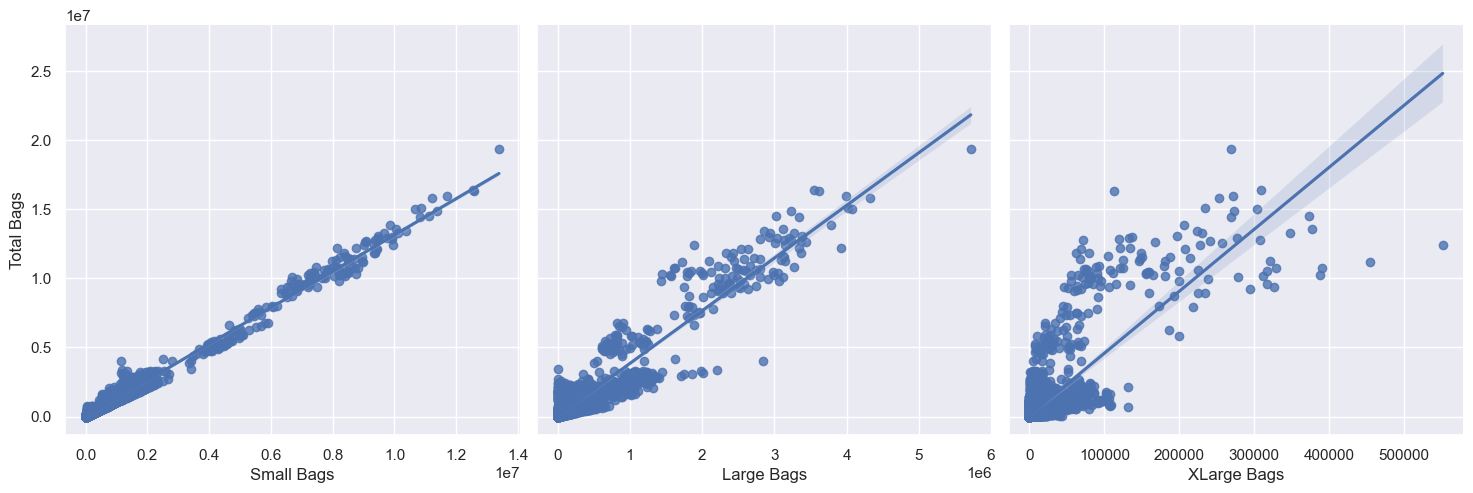

In [61]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

Observations:
1. There is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags.
2. There is a weak co-relation between TotalVolume Vs XLarge and TotalBags Vs XLargeBags.


<Axes: xlabel='AveragePrice'>

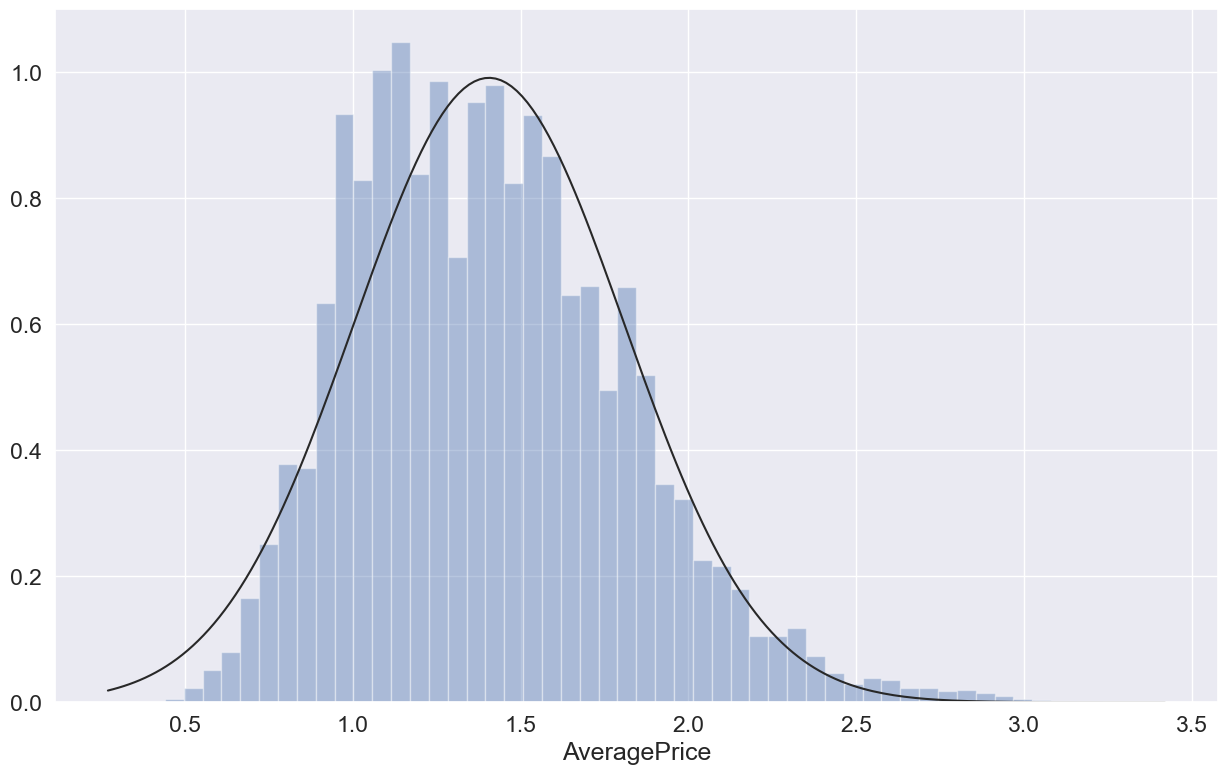

In [62]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Obsrvations:
1. Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.


## average price of conventional vs. organic.

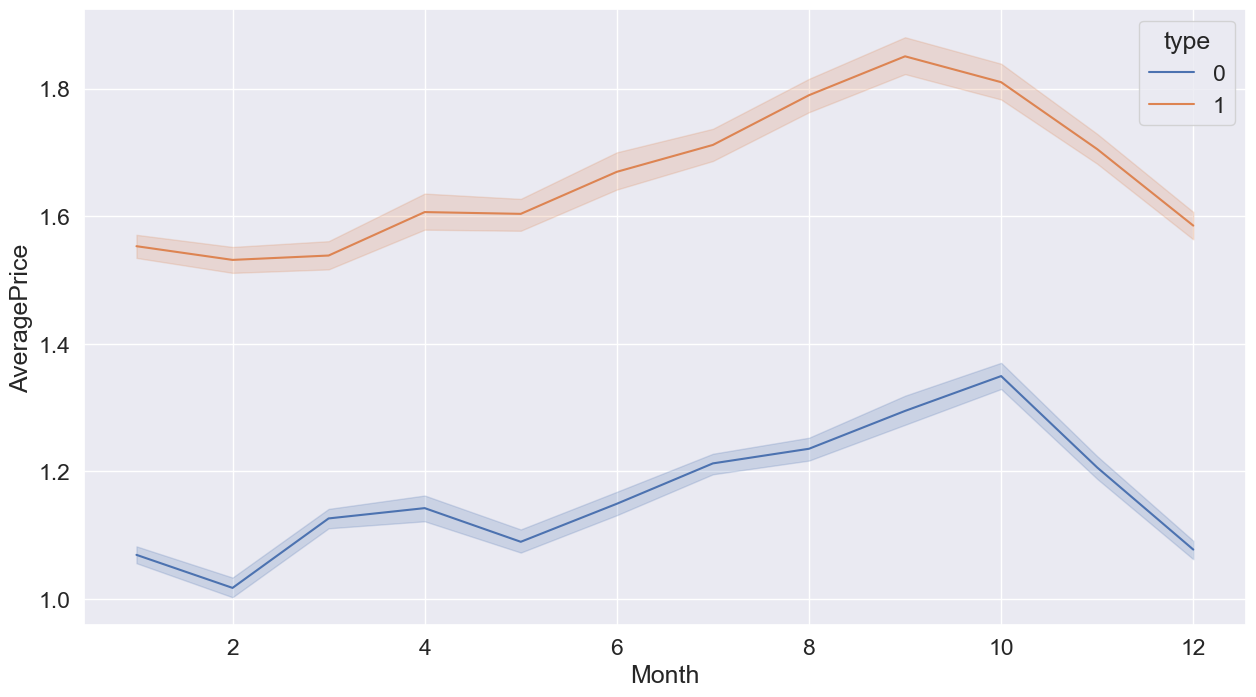

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

__Observation:__
1. Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

## Region vs average price

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

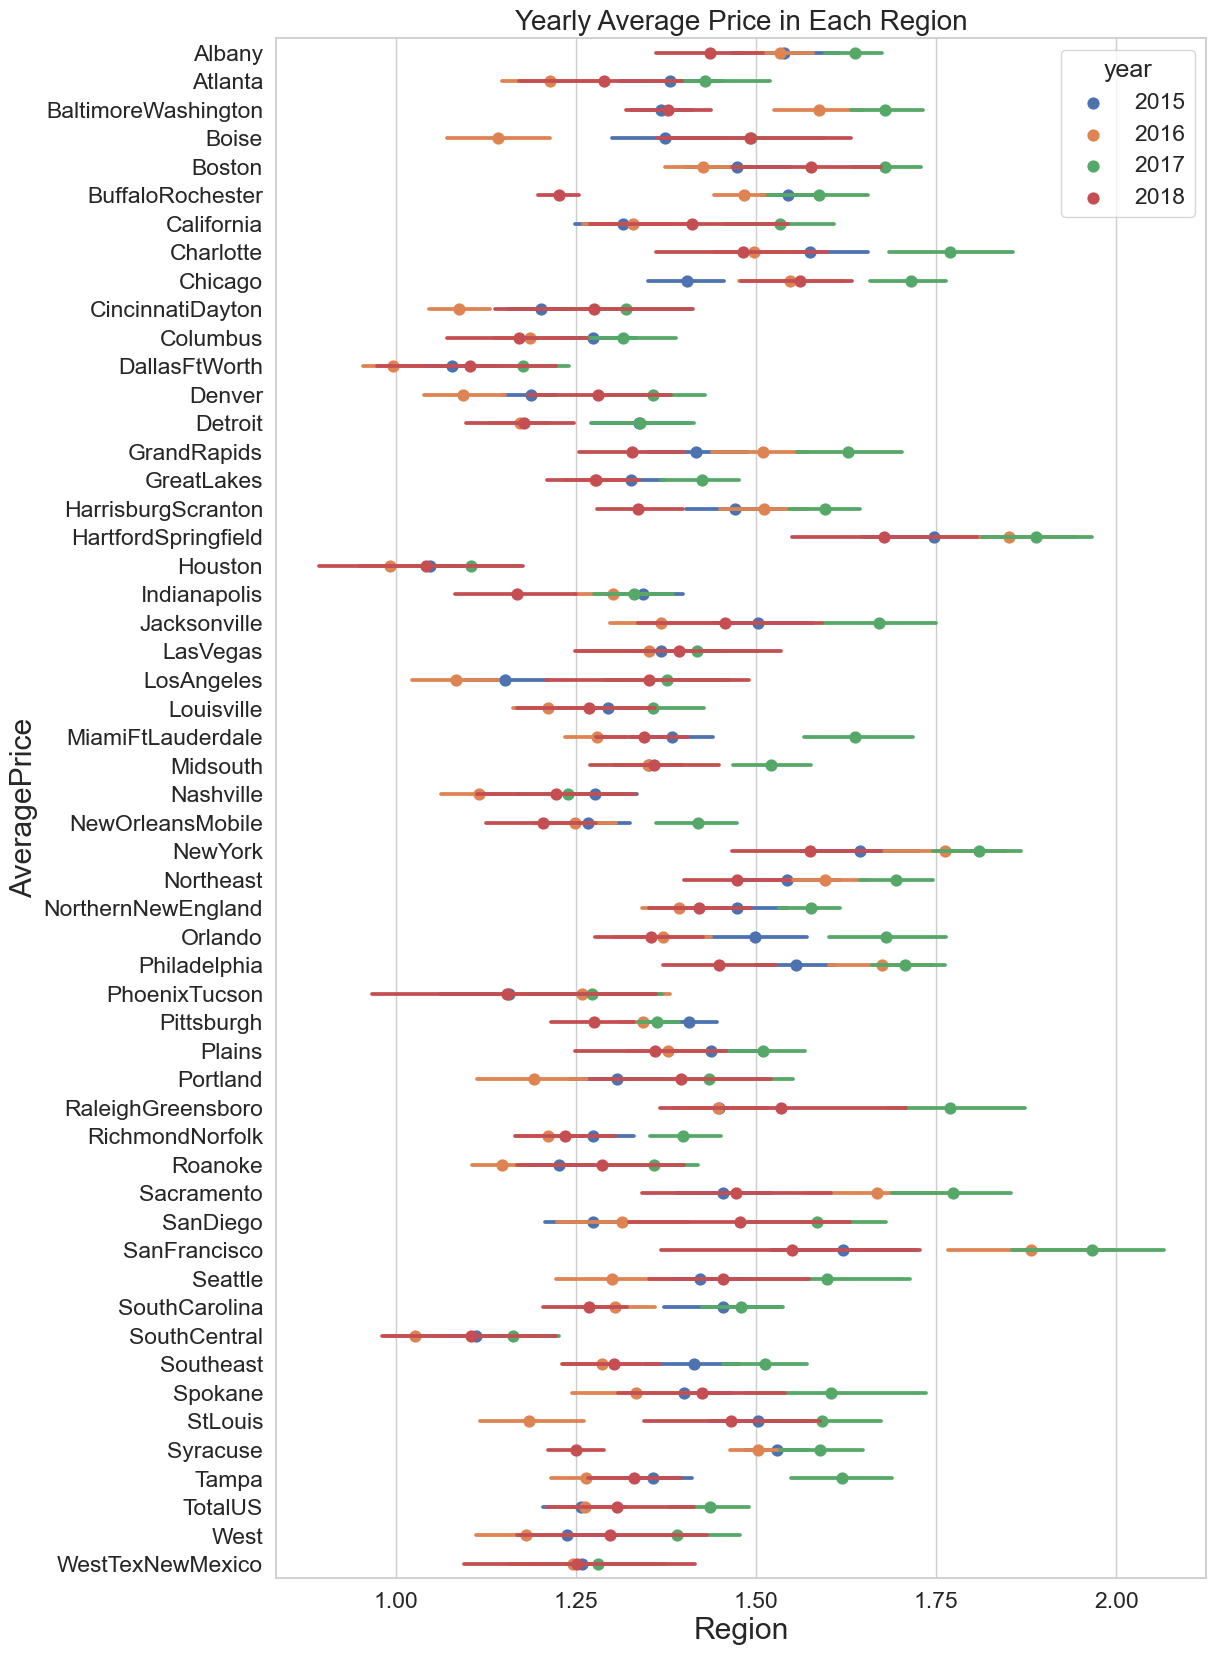

In [88]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

__Region Vs AveragePrice distribution__
1. From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.
2. For Conventional Type we have an average price < 1.50$.

Text(0.5, 1.0, 'Type Average Price in Each Region')

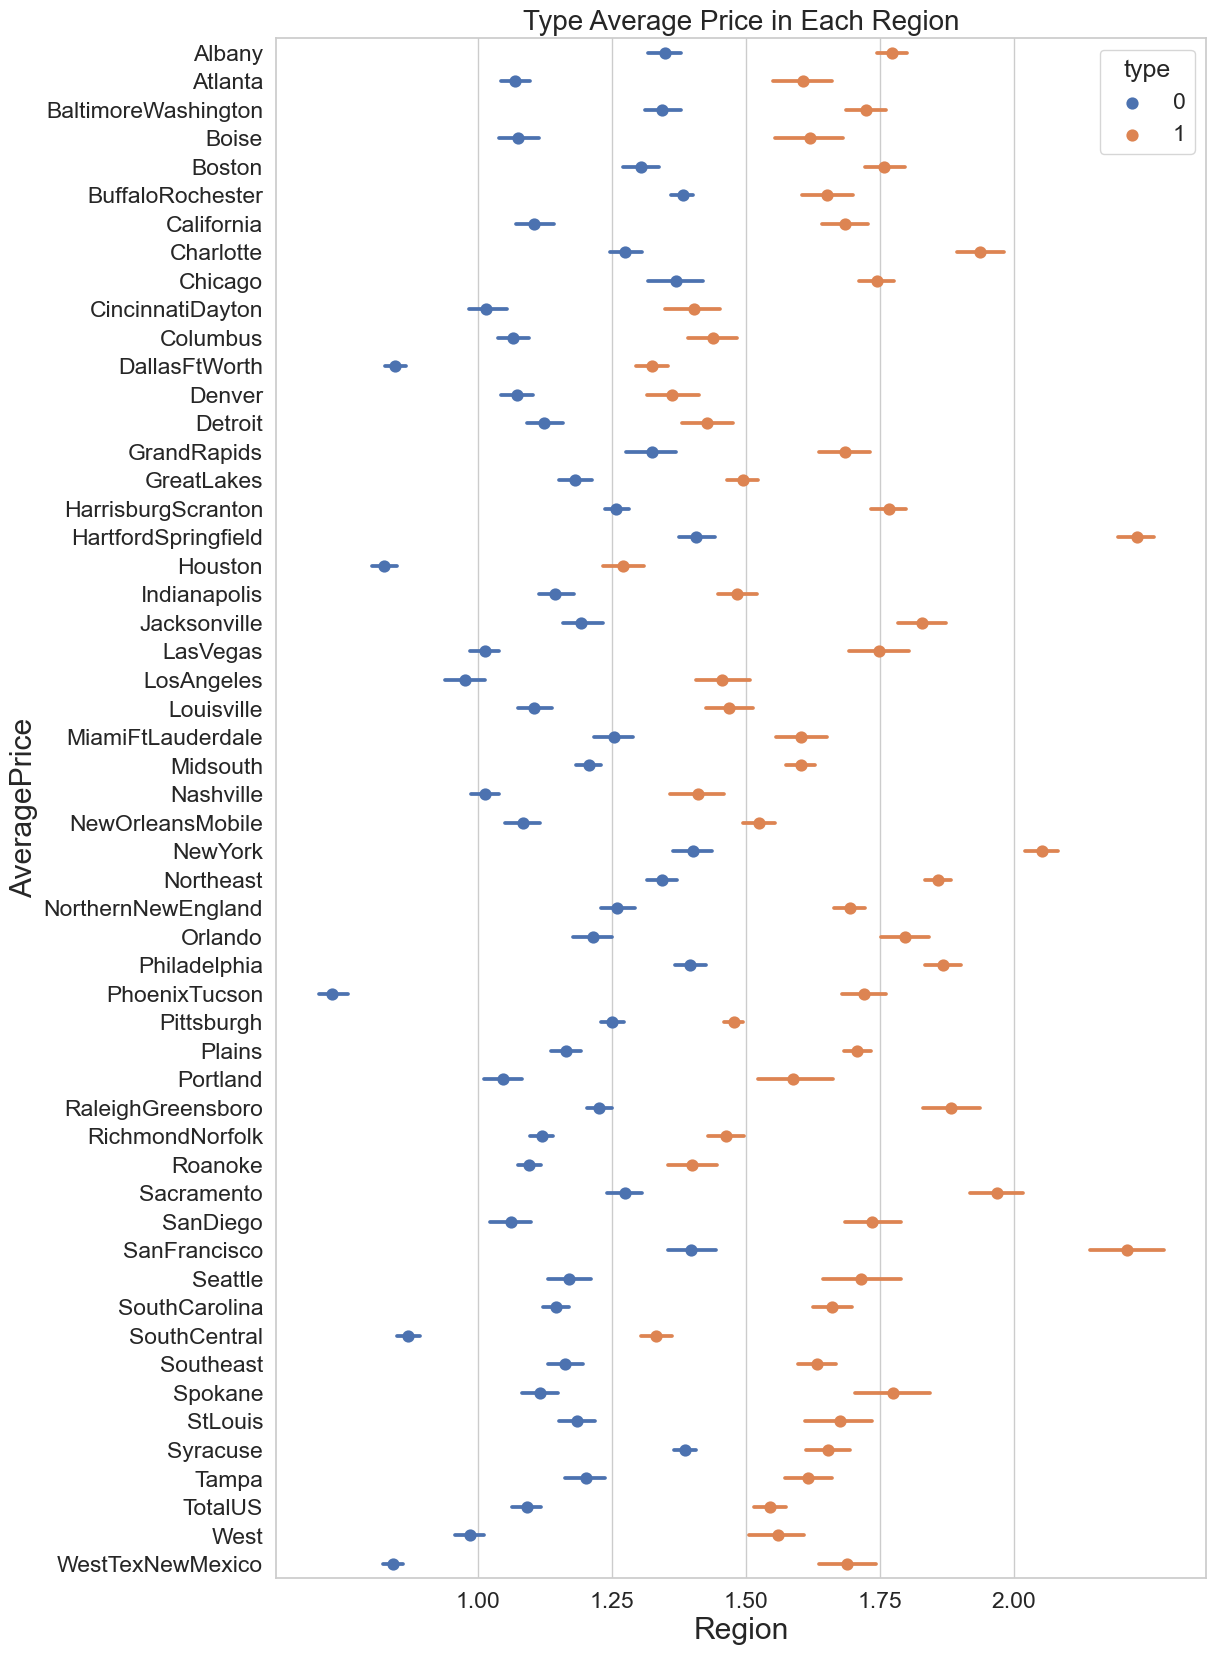

In [90]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

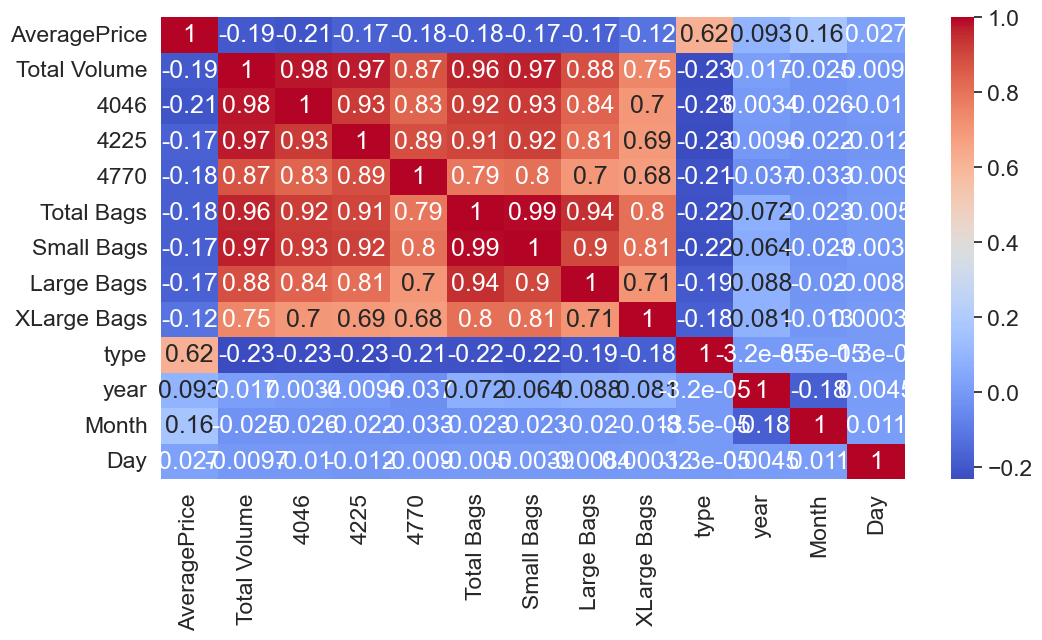

In [72]:
#Correlation using heatmap
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.show()

Observations:
1. - As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other.

- Now we need to do some Feature Engineering on the __categorical Features : region and type__

## * Feature Engineering for Model building

In [73]:
df['region'].nunique()

54

In [74]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [75]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


 ## Classifying Type of Avocado

# Using Regression

In [81]:
X=df[['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=df.type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 4)
Y Train Shape  (14599,)
X Test Shape  (3650, 4)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.8558904109589041
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1393                     455
Conventional                 71                    1731
----------------------------------------------------------------------------------------


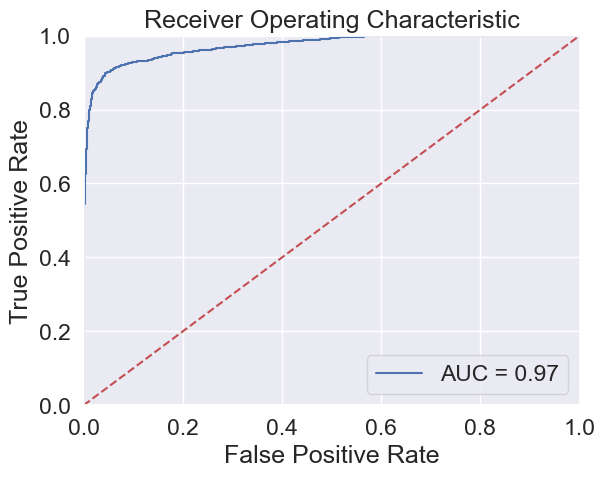

In [82]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Randomforest classifier

Accuracy score for test data using Random Forest : 0.9515068493150685
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1764                      84
Conventional                 93                    1709
----------------------------------------------------------------------------------------


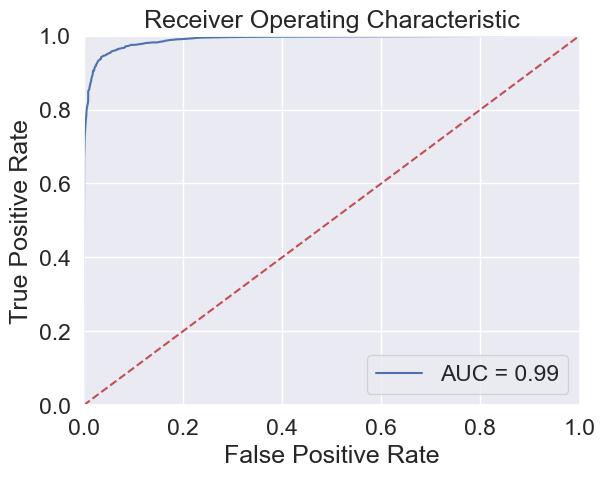

In [83]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

__Conclusion__
1. Accuracy in Random Forest Classifier is greater than Logistic Regression